In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

Part : 1

In [3]:
df = pd.read_csv("Mall_Customers.csv")

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
required_df = df[['Annual Income (k$)', 'Spending Score (1-100)']]

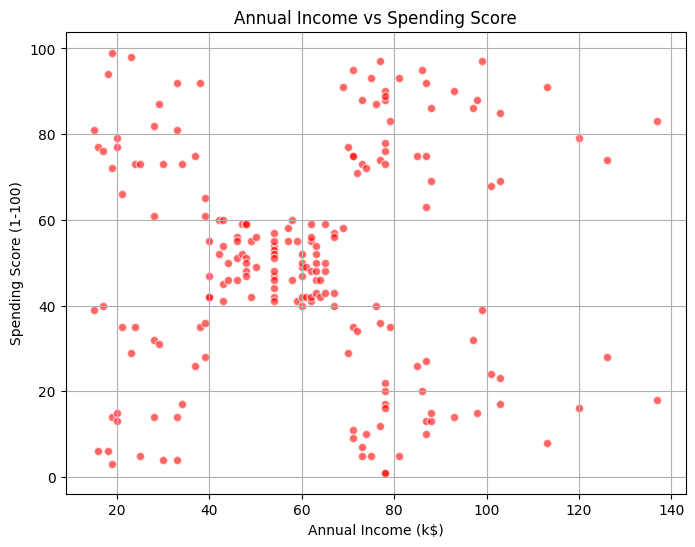

In [8]:
plt.figure(figsize=(8, 6))
plt.scatter(required_df['Annual Income (k$)'], required_df['Spending Score (1-100)'], c='red', alpha=0.6, edgecolors='w')
plt.title("Annual Income vs Spending Score")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.grid(True)
plt.show()


Part : 2

In [9]:
from sklearn.cluster import KMeans

wcss = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=42)
    kmeans.fit(required_df)
    wcss.append(kmeans.inertia_)



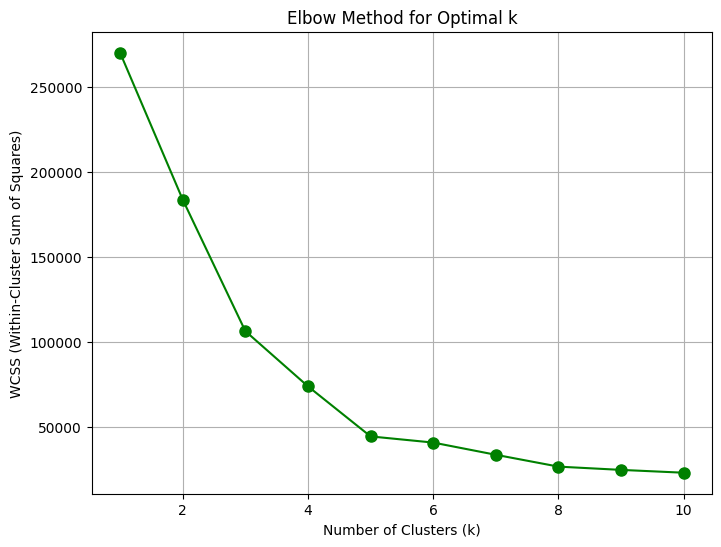

In [10]:

plt.figure(figsize=(8, 6))
plt.plot(K_range, wcss, 'go-', markersize=8)
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.grid(True)
plt.show()

In [11]:
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, init="k-means++", random_state=42)
y_kmeans = kmeans.fit_predict(required_df)

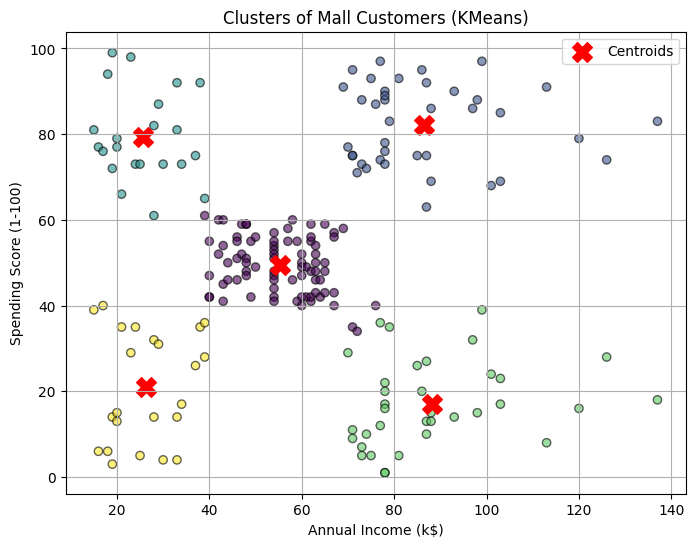

In [12]:
plt.figure(figsize=(8, 6))
plt.scatter(required_df['Annual Income (k$)'], required_df['Spending Score (1-100)'],
            c=y_kmeans, cmap='viridis', alpha=0.6, edgecolor='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='red', marker='X', label='Centroids')
plt.title("Clusters of Mall Customers (KMeans)")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.grid(True)
plt.show()


Part-3

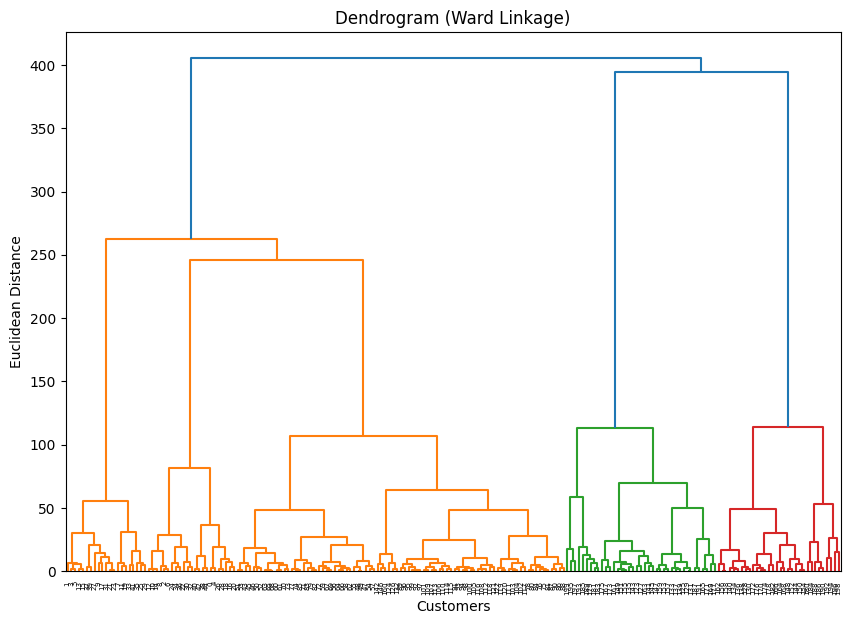

In [13]:
plt.figure(figsize=(10, 7))
dendro = sch.dendrogram(sch.linkage(required_df, method='ward'))
plt.title("Dendrogram (Ward Linkage)")
plt.xlabel("Customers")
plt.ylabel("Euclidean Distance")
plt.show()


In [14]:
hc = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(required_df)

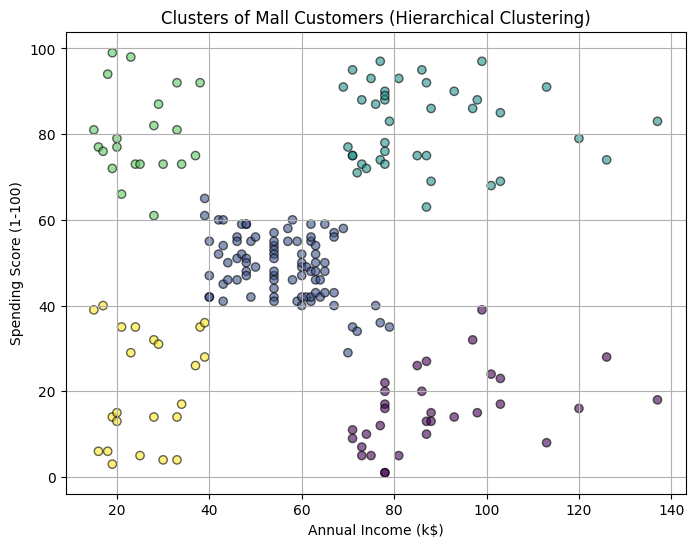

In [15]:

plt.figure(figsize=(8, 6))
plt.scatter(required_df['Annual Income (k$)'], required_df['Spending Score (1-100)'],
            c=y_hc, cmap='viridis', alpha=0.6, edgecolor='k', marker='o')
plt.title("Clusters of Mall Customers (Hierarchical Clustering)")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.grid(True)
plt.show()

Part-4

In [16]:

dbscan = DBSCAN(eps=7, min_samples=6, metric='euclidean')
y_dbscan = dbscan.fit_predict(required_df)

# Cluster labels (-1 means noise)
print("Cluster labels:", set(y_dbscan))


Cluster labels: {np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(-1)}


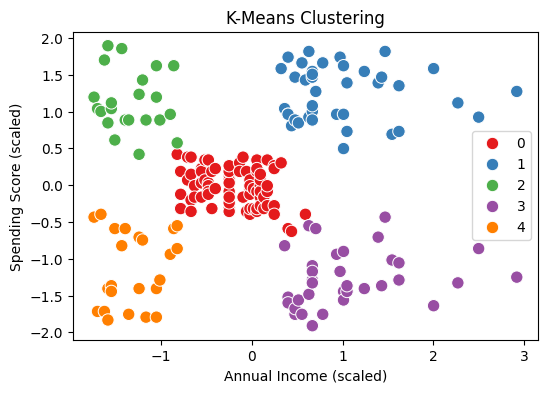

In [17]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(required_df) 

def plot_clusters(X, labels, title):
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette='Set1', s=80)
    plt.title(title)
    plt.xlabel('Annual Income (scaled)')
    plt.ylabel('Spending Score (scaled)')
    plt.legend()
    plt.show()


# --- K-Means ---
kmeans = KMeans(n_clusters=5, init="k-means++", random_state=42)
labels_kmeans = kmeans.fit_predict(X_scaled)
plot_clusters(X_scaled, labels_kmeans, 'K-Means Clustering')


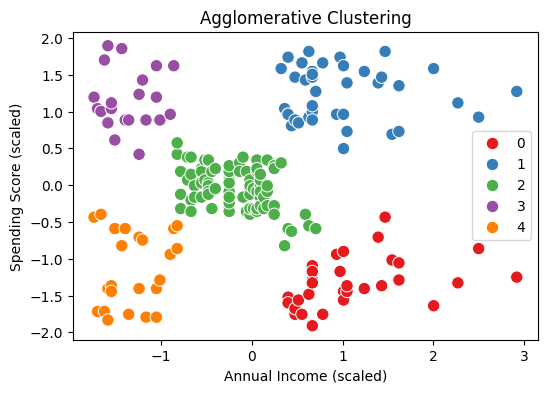

In [18]:
# --- Agglomerative Clustering ---
agglo = AgglomerativeClustering(n_clusters=5, linkage='ward')
labels_agglo = agglo.fit_predict(X_scaled)
plot_clusters(X_scaled, labels_agglo, 'Agglomerative Clustering')

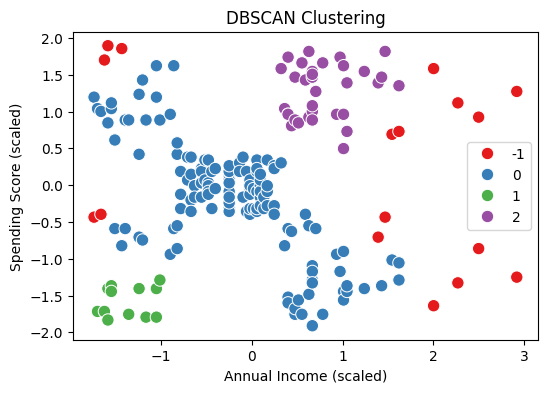

In [19]:

# --- DBSCAN ---
dbscan = DBSCAN(eps=0.5, min_samples=9, metric='euclidean')
labels_dbscan = dbscan.fit_predict(X_scaled)


plot_clusters(X_scaled, labels_dbscan, 'DBSCAN Clustering')




In [21]:
print("Silhouette Score (K-Means):", silhouette_score(X_scaled, labels_kmeans))
print("Silhouette Score (Agglomerative):", silhouette_score(X_scaled, labels_agglo))
print("Silhouette Score (DBSCAN):", silhouette_score(X_scaled, labels_dbscan))


Silhouette Score (K-Means): 0.5546571631111091
Silhouette Score (Agglomerative): 0.5538089226688662
Silhouette Score (DBSCAN): 0.31732880330547364
